# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
# Explore the dataset
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train.flatten())))


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 100


In [4]:
import matplotlib.pyplot as plt

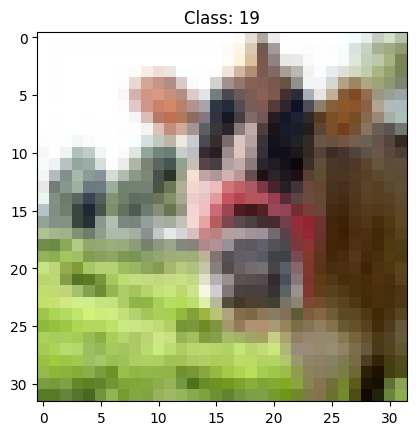

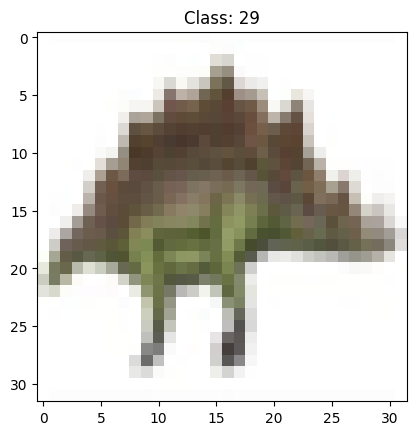

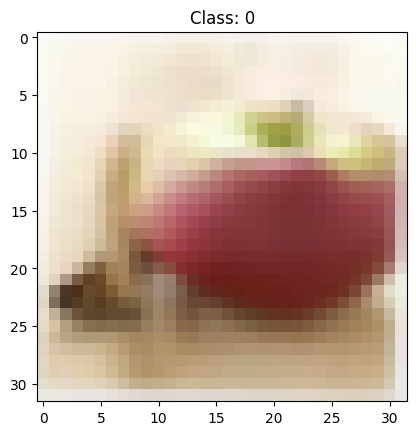

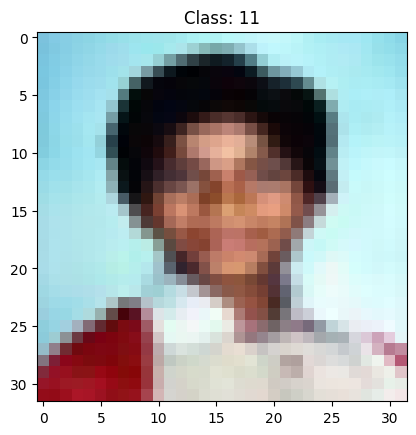

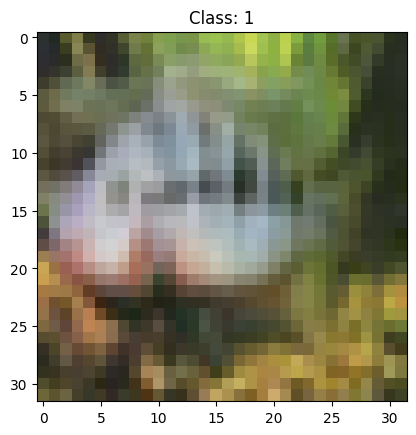

In [5]:
# Visualize some images
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator on training data
datagen.fit(x_train)


# Adjust validation split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # CIFAR-100 classes
])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [24]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [LearningRateScheduler(lr_scheduler)]


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [25]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5  # Halve the learning rate after epoch 10

callbacks = [LearningRateScheduler(lr_scheduler)]

# Train with augmented data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=30,
    callbacks=callbacks
)




Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


507/507 ━━━━━━━━━━━━━━━━━━━━ 44s 72ms/step - accuracy: 0.0252 - loss: 4.8892 - val_accuracy: 0.0264 - val_loss: 10.3389 - learning_rate: 0.0010
Epoch 2/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.0477 - loss: 4.2974 - val_accuracy: 0.0597 - val_loss: 4.1954 - learning_rate: 0.0010
Epoch 3/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.0579 - loss: 4.1673 - val_accuracy: 0.0786 - val_loss: 4.0574 - learning_rate: 0.0010
Epoch 4/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.0654 - loss: 4.1021 - val_accuracy: 0.0969 - val_loss: 3.8317 - learning_rate: 0.0010
Epoch 5/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.0704 - loss: 4.0477 - val_accuracy: 0.1167 - val_loss: 3.7523 - learning_rate: 0.0010
Epoch 6/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.0749 - loss: 3.9952 - val_accuracy: 0.1244 - val_loss: 3.6850 - learning_rate: 0.0010
Epoch 7/30
507/507 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.0799 - loss: 3.959

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Print accuracy and detailed metrics
print("Test Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print(classification_report(y_test_classes, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Test Accuracy: 0.2211
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       100
           1       0.37      0.07      0.12       100
           2       0.15      0.08      0.11       100
           3       0.14      0.03      0.05       100
           4       0.11      0.02      0.03       100
           5       0.15      0.07      0.09       100
           6       0.19      0.15      0.17       100
           7       0.14      0.13      0.13       100
           8       0.09      0.25      0.13       100
           9       0.42      0.10      0.16       100
          10       0.00      0.00      0.00       100
          11       0.40      0.04      0.07       100
          12       0.29      0.20      0.24       100
          13       0.22      0.39      0.28       100
          14       0.15      0.12      0.13       100
          15       0.14      0.09      0.11       100
          16      

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

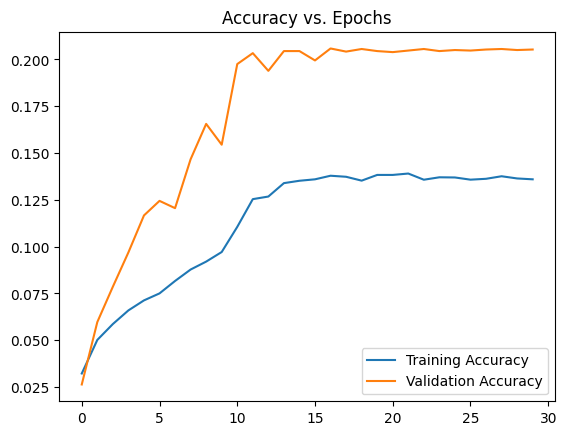

In [27]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy vs. Epochs")
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Load pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=x)

# Freeze ResNet layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_resnet = resnet_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=20
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.0087 - loss: 4.7461 - val_accuracy: 0.0089 - val_loss: 4.6054
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 29s 56ms/step - accuracy: 0.0094 - loss: 4.6060 - val_accuracy: 0.0094 - val_loss: 4.6061
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.0109 - loss: 4.6053 - val_accuracy: 0.0094 - val_loss: 4.6063
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.0102 - loss: 4.6050 - val_accuracy: 0.0094 - val_loss: 4.6065
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.0086 - loss: 4.6053 - val_accuracy: 0.0094 - val_loss: 4.6067
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.0119 - loss: 4.6050 - val_accuracy: 0.0094 - val_loss: 4.6068
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.0098 - loss: 4.6052 - val_accuracy: 0.0094 - val_loss: 4.6068
Epoch 8/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.0112 - loss: 4.6049 - val_accurac

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test set
y_pred_enhanced = model.predict(x_test)
y_pred_classes_enhanced = y_pred_enhanced.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Test Accuracy
enhanced_accuracy = accuracy_score(y_test_classes, y_pred_classes_enhanced)
print("Enhanced Test Accuracy:", enhanced_accuracy)

# Classification Report
print(classification_report(y_test_classes, y_pred_classes_enhanced))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Enhanced Test Accuracy: 0.2211
              precision    recall  f1-score   support

           0       0.63      0.46      0.53       100
           1       0.37      0.07      0.12       100
           2       0.15      0.08      0.11       100
           3       0.14      0.03      0.05       100
           4       0.11      0.02      0.03       100
           5       0.15      0.07      0.09       100
           6       0.19      0.15      0.17       100
           7       0.14      0.13      0.13       100
           8       0.09      0.25      0.13       100
           9       0.42      0.10      0.16       100
          10       0.00      0.00      0.00       100
          11       0.40      0.04      0.07       100
          12       0.29      0.20      0.24       100
          13       0.22      0.39      0.28       100
          14       0.15      0.12      0.13       100
          15       0.14      0.09      0.11       100
         

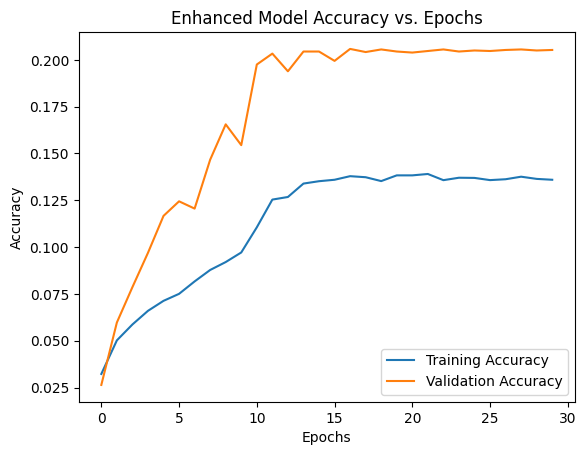

In [30]:
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Enhanced Model Accuracy vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

#### Did the model's performance improve?

No, the enhanced model's performance did not show significant improvement. The test accuracy remained at 22.11%, which is only marginally better than the baseline accuracy of 21.22%. This suggests that even with enhancements, the current approach is insufficient to achieve the desired performance (55% accuracy or higher).


#### Why do you think this is?

Dataset Complexity:

The CIFAR-100 dataset is highly challenging due to its 100 diverse classes and small image size (32x32), which limits the amount of detail the model can capture.

Model Limitations:

Despite adding more layers, Dropout, and Batch Normalization, the enhanced CNN model lacks the complexity and capacity to handle CIFAR-100 effectively.
The model might not be deep enough or optimized adequately to extract meaningful hierarchical features required for high accuracy.

Training Data Augmentation:

While data augmentation helps, the model might require more epochs or additional regularization techniques to fully leverage augmented data.

Overfitting to Augmented Data:

The large variability introduced by augmentation could make training harder without a larger and deeper architecture to handle the augmented data effectively.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.